Shyam Kumar Ray Yadav (18449154)

Sonu Kumar (15651099)

Ahmad Raza Khawaja (25848862)

# Problem sheet 1

## Exercise 1.1: tidying a dataset.

Inspect the dataset contained in the file ```runtimes.csv``` and import it into Python as a pandas dataframe. Note that one variable (the number of threads) is encoded in column names. Bring this dataset into tidy form, as described in [https://r4ds.hadley.nz/data-tidy.html](https://r4ds.hadley.nz/data-tidy.html) using functions such as ```pandas.melt``` (and some post-processing with auxiliary functions). Make sure that columns in the resulting dataframe have meaningful names and dtypes.

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
from PIL import Image

In [60]:
df = pd.read_csv('runtimes.csv', comment = '#')
print(df)

          algo     size        time1        time2        time3        time4  \
0  distributed     4096     3.736606     2.133074     1.673441     1.515788   
1  distributed    16384    14.792794     7.894031     5.681171     4.597697   
2  distributed    65536    59.123347    30.762486    21.436608    16.510129   
3  distributed   262144   240.747448   124.448679    85.384094    64.732369   
4  distributed  1048576  1097.788352   567.038172   383.563617   290.182877   
5  distributed  4194304  4845.007061  2501.408669  1673.959357  1269.887092   
6       single     4096     3.622693          NaN          NaN          NaN   
7       single    16384    26.792361          NaN          NaN          NaN   
8       single    65536   127.812326          NaN          NaN          NaN   
9       single   262144   281.994783          NaN          NaN          NaN   

         time5  
0     1.475265  
1     3.988286  
2    13.637740  
3    53.544233  
4   242.494498  
5  1072.378137  
6          

Now, I want to bring this data frame into tidy form by using the pandas.melt function. I want to preserve the name of the algorithms and their size and store the timelists as 'timelists' varialbe, and value as 'time'. 

In [61]:
tidy_df = pd.melt(df, id_vars = ['algo', 'size'], var_name = 'timelist', value_name = 'time')
print(tidy_df)

           algo     size timelist         time
0   distributed     4096    time1     3.736606
1   distributed    16384    time1    14.792794
2   distributed    65536    time1    59.123347
3   distributed   262144    time1   240.747448
4   distributed  1048576    time1  1097.788352
5   distributed  4194304    time1  4845.007061
6        single     4096    time1     3.622693
7        single    16384    time1    26.792361
8        single    65536    time1   127.812326
9        single   262144    time1   281.994783
10  distributed     4096    time2     2.133074
11  distributed    16384    time2     7.894031
12  distributed    65536    time2    30.762486
13  distributed   262144    time2   124.448679
14  distributed  1048576    time2   567.038172
15  distributed  4194304    time2  2501.408669
16       single     4096    time2          NaN
17       single    16384    time2          NaN
18       single    65536    time2          NaN
19       single   262144    time2          NaN
20  distribut

Now, since the 'single' algorithms with single threads have specific time value but not the algorithms with multiple threads, total number of threads with null values is calculated. 

In [62]:
tidy_df.isnull().sum()

algo         0
size         0
timelist     0
time        16
dtype: int64

Now that we have 16 null values which does not contribute to the relevant information, we can remove it as well. 

In [63]:
# Convert infinite values to NaN
tidy_df.replace([np.inf, -np.inf], np.nan, inplace=True)
cleaned_df = tidy_df.dropna()
print(cleaned_df)

           algo     size timelist         time
0   distributed     4096    time1     3.736606
1   distributed    16384    time1    14.792794
2   distributed    65536    time1    59.123347
3   distributed   262144    time1   240.747448
4   distributed  1048576    time1  1097.788352
5   distributed  4194304    time1  4845.007061
6        single     4096    time1     3.622693
7        single    16384    time1    26.792361
8        single    65536    time1   127.812326
9        single   262144    time1   281.994783
10  distributed     4096    time2     2.133074
11  distributed    16384    time2     7.894031
12  distributed    65536    time2    30.762486
13  distributed   262144    time2   124.448679
14  distributed  1048576    time2   567.038172
15  distributed  4194304    time2  2501.408669
20  distributed     4096    time3     1.673441
21  distributed    16384    time3     5.681171
22  distributed    65536    time3    21.436608
23  distributed   262144    time3    85.384094
24  distribut

## Exercise 1.2: basic transformations and visualizations.

The file ```mpg-data.csv``` contains the ```mpg``` example dataset from the ```ggplot2``` library [https://ggplot2.tidyverse.org/reference/mpg.html](https://ggplot2.tidyverse.org/reference/mpg.html) which contains information about the fuel efficiency of various car models.


1. Import the dataset into Python via pandas and briey specify the dtype of each column (consult the documentation).


In [64]:
df = pd.read_csv('mpg-data.csv')
print(df)


    manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
0           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
1           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
2           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
3           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
4           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
229   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
230   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
231   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
232   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
233   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

       class  
0    compact  
1    compact  
2    compact  
3    compact  
4    compact  
..       

In [65]:
print(df.dtypes)

manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object


In [66]:
df.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

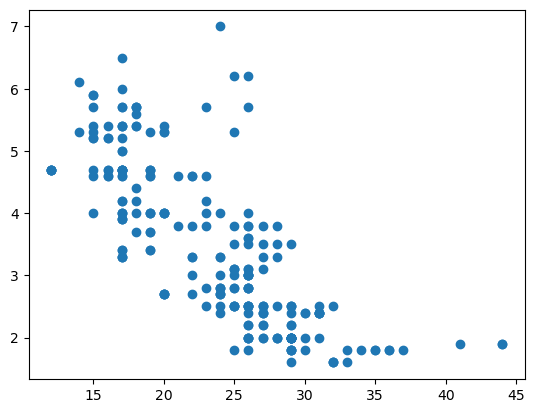

In [67]:
plt.scatter(df.hwy, df.displ)
plt.show()

In [68]:
#Splitting the dataset into different group of car classes.
car_classes = df.groupby('class')

#Initializing the plot
plt.figure(figsize = (10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Now I want perform linear regression on the dependancy of hwy(highway mile per galon) on displ(engine displacement).

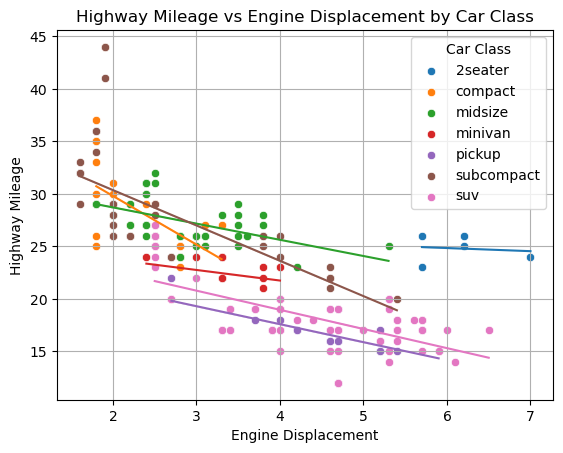

In [69]:
#Just to remove the future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

for class_name, class_data in car_classes:
    X = class_data[['displ']]
    y = class_data['hwy']
    #Creating a linear regression model
    model = LinearRegression()
    # #fit the model to the above co-ordinates
    model.fit(X,y)

    #plotting the line of regression
    sns.scatterplot(x = 'displ', y = 'hwy', data = class_data, label = class_name)
    #plot the regression line
    sns.lineplot(x = X.squeeze(), y = model.predict(X))

#Setting labels and title
plt.xlabel('Engine Displacement')
plt.ylabel('Highway Mileage')
plt.title('Highway Mileage vs Engine Displacement by Car Class')

#Adding the legend
plt.legend(title = 'Car Class')

#Show plot
plt.grid(True)
plt.show()


In [70]:
#grouping the data by class and year and calculating the median for each group
median_hwy_by_class_year = df.groupby(['class', 'year'])['hwy'].median()

In [71]:
#presenting the dataset in the table. 
median_hwy_by_class_year = median_hwy_by_class_year.reset_index()

#renaming the rows and columns names properly.
median_hwy_by_class_year = median_hwy_by_class_year.rename(columns = {'class':'Car Class', 'year':'Year', 'hwy':'Median Hwy'})

#Converting the dataframe to tabulate format
table = tabulate(median_hwy_by_class_year, headers ='keys', tablefmt = 'grid')
print(table)

+----+-------------+--------+--------------+
|    | Car Class   |   Year |   Median Hwy |
+====+=============+========+==============+
|  0 | 2seater     |   1999 |         24.5 |
+----+-------------+--------+--------------+
|  1 | 2seater     |   2008 |         25   |
+----+-------------+--------+--------------+
|  2 | compact     |   1999 |         26   |
+----+-------------+--------+--------------+
|  3 | compact     |   2008 |         29   |
+----+-------------+--------+--------------+
|  4 | midsize     |   1999 |         26   |
+----+-------------+--------+--------------+
|  5 | midsize     |   2008 |         28   |
+----+-------------+--------+--------------+
|  6 | minivan     |   1999 |         22   |
+----+-------------+--------+--------------+
|  7 | minivan     |   2008 |         23   |
+----+-------------+--------+--------------+
|  8 | pickup      |   1999 |         17   |
+----+-------------+--------+--------------+
|  9 | pickup      |   2008 |         17   |
+----+----

# Exercise 1.3: hue rotation

Import the photo of parrots used in the lecture (available at [https://en.wikipedia.org/wiki/File:BlueAndYellowMacaw_AraArarauna.jpg](https://en.wikipedia.org/wiki/File:BlueAndYellowMacaw_AraArarauna.jpg)) in Python as shown in the lecture. Then for a given angle  $\varphi \in [0, 2\pi]$,  implement a function that converts the image to HSV space, applies a rotation by angle  $\varphi$ to the hue channel (where  $\varphi = 2\pi$  would correspond to a whole rotation and is thus equivalent to  $\varphi = 0$), and transforms the resulting image back to RGB space. Apply this function to the image for  $\varphi \in \{\frac{k}{2\pi}|k \in \{0, 1, 2, 3, 4\} \}$ and visualize the obtained 'rotated' images.

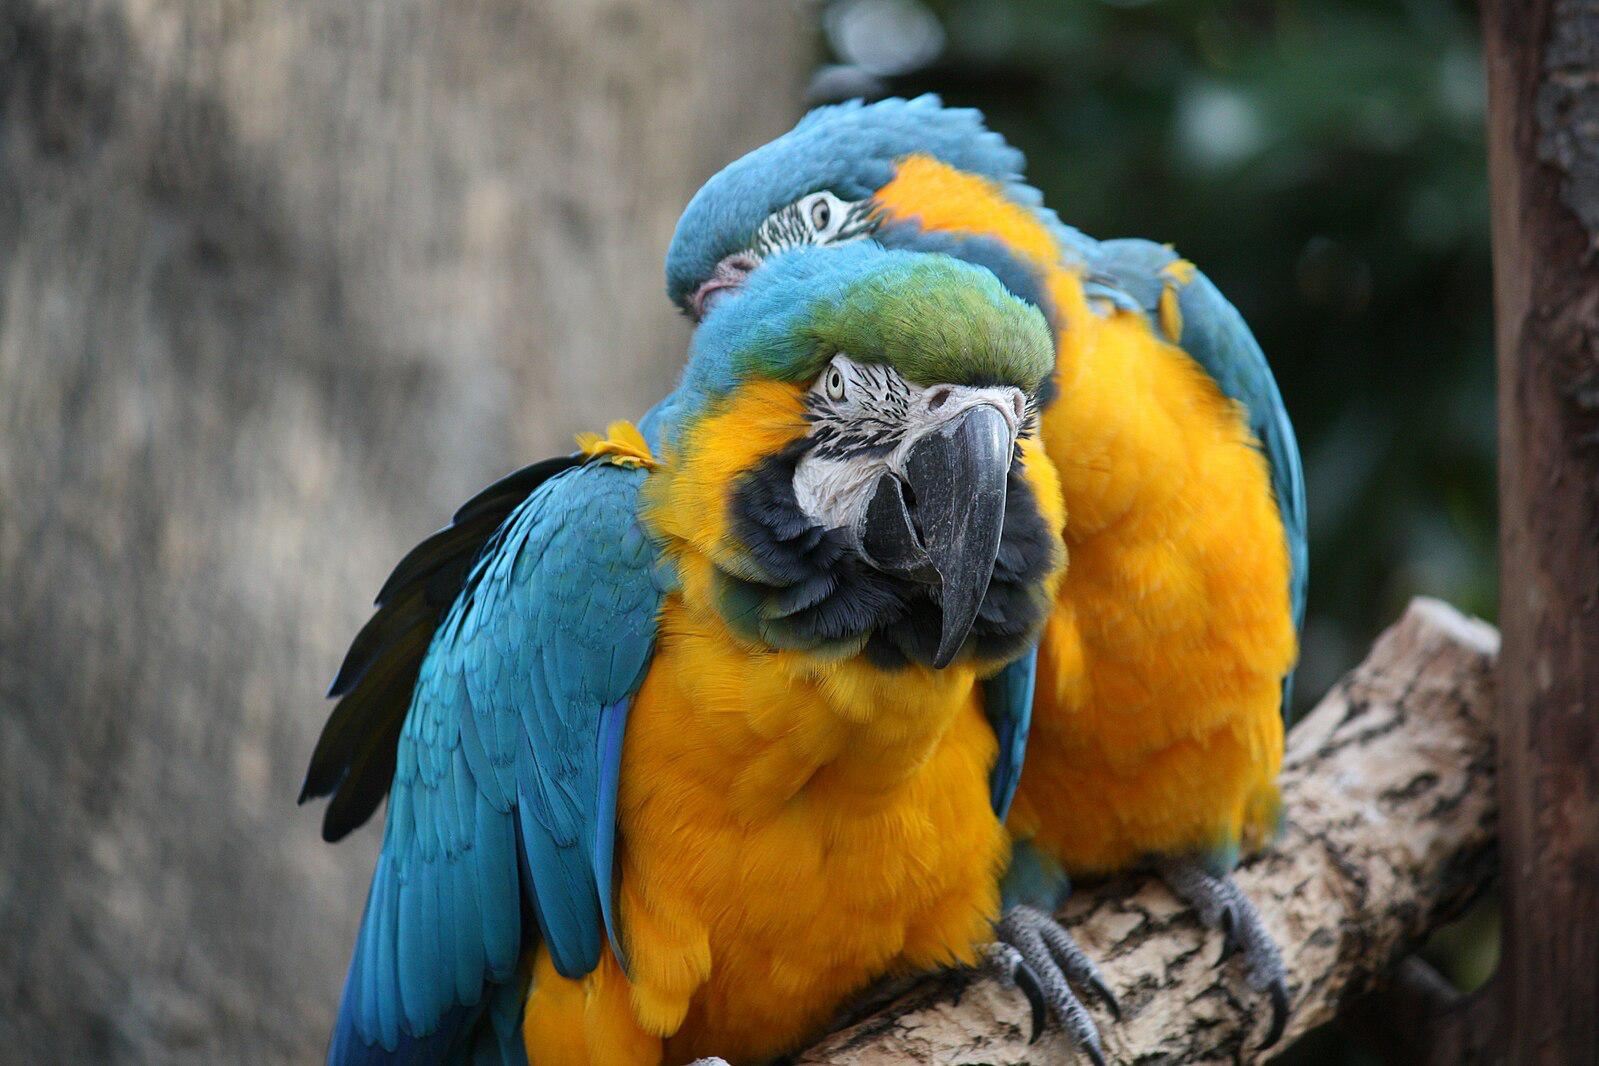

In [72]:
image = Image.open('BlueAndYellowMacaw_AraArarauna.jpg')
display(image)

In [74]:
#define a function to rotate the image with given angle.
def rotate_hue_pil(image, angle):
    """
    Rotate the hue channel of an image by a specified angle.

    Args:
    -image: PIL Image ojbect
    -angle: Angle in radians ((φ ∈ [0, 2π))

    Returns:
    -rotated_image: PIL Image object with hue rotated
    """

    #Converting the image to HSV color space
    hsv_image = image.convert('HSV')

    #Separate hue, saturation, and value channels
    h, s, v = hsv_image.split()

    #Convert channels to numpy arrays for arithmetic operations
    h_array = np.array(h)

    #Apply rotation to hue channel and preventing the overflow from π range.
    h_rotated = (h_array + (angle *180/np.pi)) % 360

    #Convert back to PIL image
    h_rotated = Image.fromarray(h_rotated.astype(np.uint8))

    #Merge modified channels back to HSV image
    rotated_hsv_image = Image.merge('HSV', (h_rotated, s, v))

    #Convert HSV image back to RGB color space
    rotated_rgb_image = rotated_hsv_image.convert('RGB')

    return rotated_rgb_image

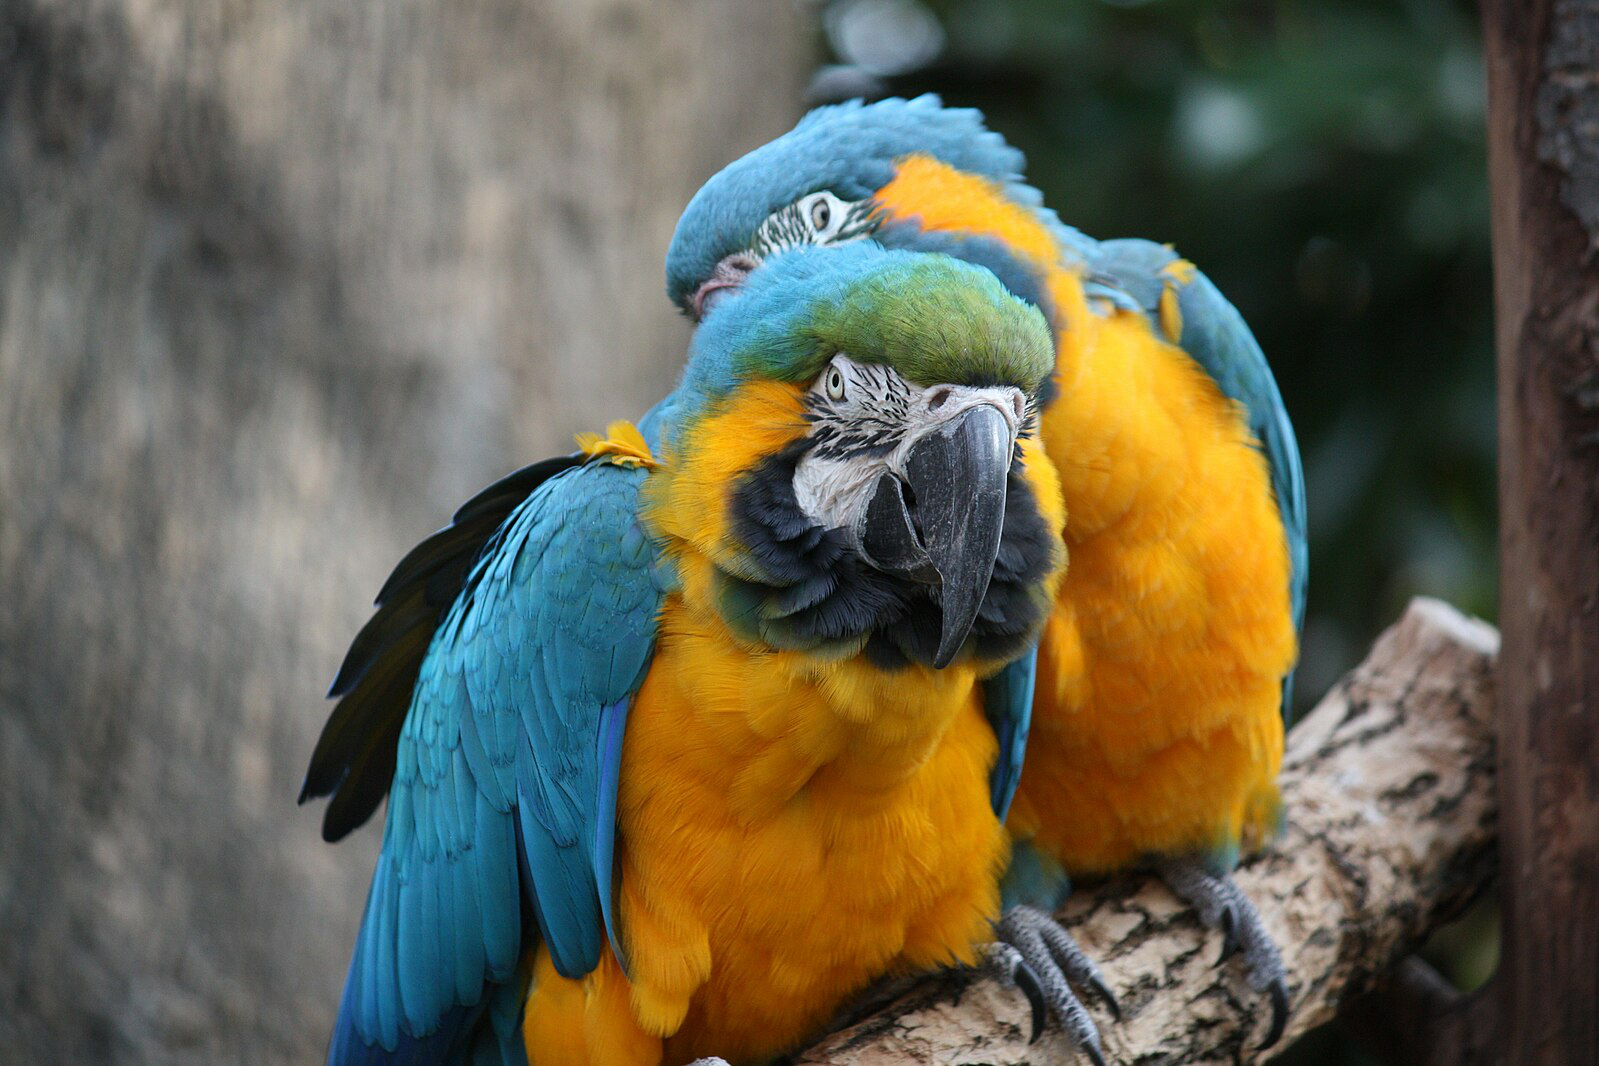

In [75]:
rotate_hue_pil(image, 2*np.pi)

In [76]:
#Define angles to rotate hue channel, according to the question
angles = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]

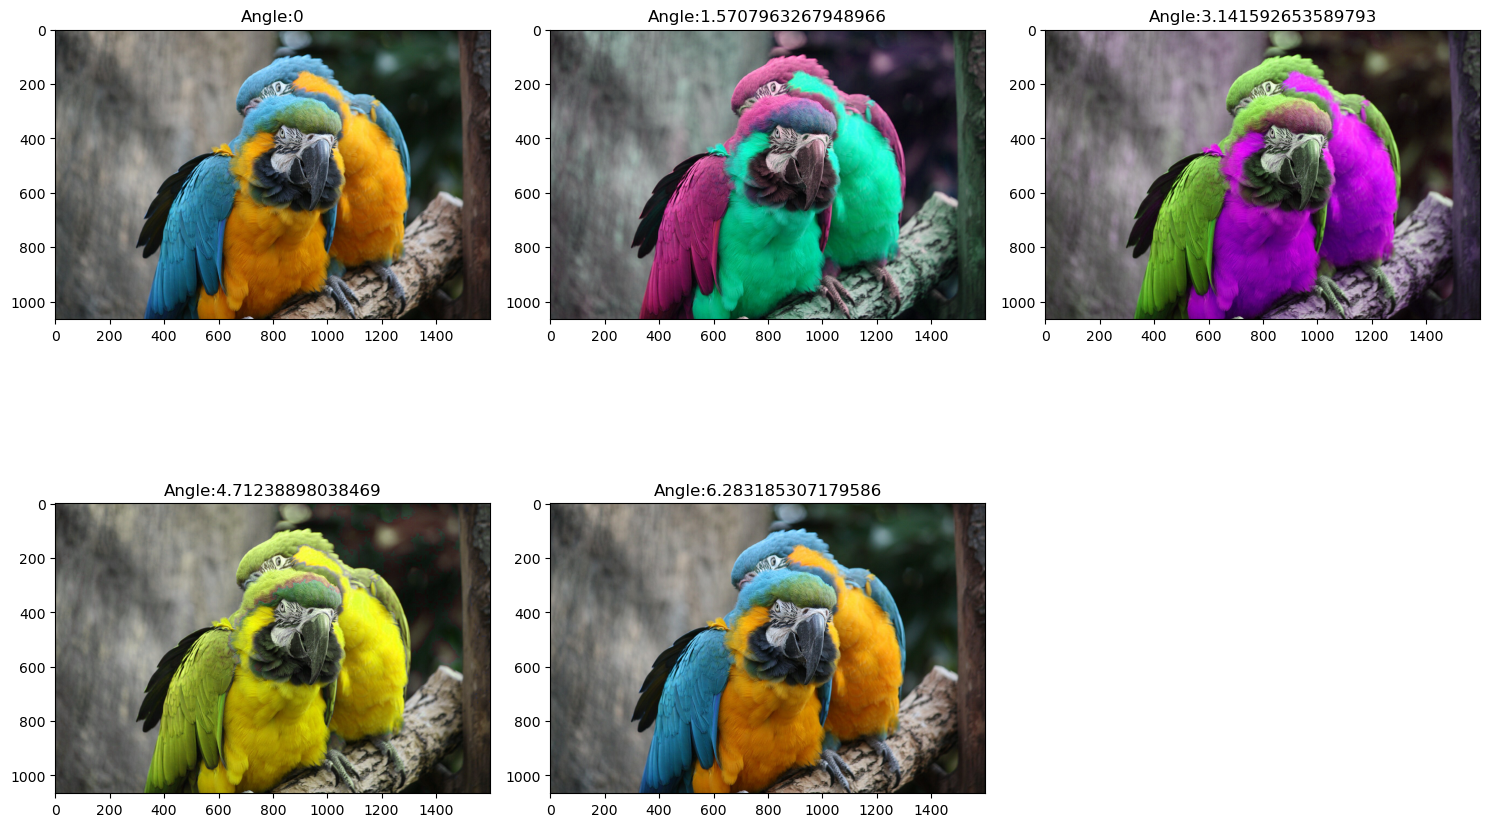

In [78]:
#Apply rotation for each angle and visualize the results
plt.figure(figsize = (15, 10))
for i, angle in enumerate(angles):
    #Rotate the hue channel
    rotated_image = rotate_hue_pil(image, angle)

    #Plot rotated image
    plt.subplot(2, 3, i+1)
    plt.imshow(rotated_image)
    plt.title(f'Angle:{angle}')

plt.tight_layout()
plt.show()

## Exercise 1.4: visualizing the exponential function.

In [ ]:
##It is a pure mathematical question. So, i will do it later on. ##